In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# '\s+' tells pandas to use any spaces as the delimiter instead of ,
original_data = pd.read_csv("../data/delivery.2023.03.12.dat", delimiter='\s+')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3282774/4163960611.py:2: SyntaxWarning: invalid escape sequence '\s'
  original_data = pd.read_csv("../data/delivery.2023.03.12.dat", delimiter='\s+')


In [3]:
feature_col_names = ['F1', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12']
X_df = original_data[feature_col_names]

In [4]:
# LabelEncoder will transform the class names to numeric values
le = LabelEncoder()
le.fit(original_data['Tag'])
print("Original Classes", le.classes_)
print("Mapping", le.transform(le.classes_))
le.classes_ = np.array(['ex', 'eq', 'mis'])
print("Updated Classes", le.classes_)
print("Mapping", le.transform(le.classes_))
y = le.transform(original_data['Tag'])
y_cnts = np.unique(y, return_counts=True)[1]
print(y_cnts)

Original Classes ['eq' 'ex' 'mis']
Mapping [0 1 2]
Updated Classes ['ex' 'eq' 'mis']
Mapping [0 1 2]
[279 814 228]


In [5]:
train_inds, test_inds = train_test_split(np.arange(X_df.shape[0]), test_size=0.2, shuffle=True, random_state=42)

In [6]:
X_df = X_df.to_numpy()
X_train = X_df[train_inds]
X_test = X_df[test_inds]
y_train = y[train_inds]
y_test = y[test_inds]

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LinearDiscriminantAnalysis()

In [11]:
model.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

# Train results

In [12]:
y_pred_train = model.predict(X_train_scaled)

In [13]:
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[211   1   3]
 [  0 650   1]
 [  7   3 180]]


In [14]:
f1_score(y_train, y_pred_train, average='macro')

0.9777770900837951

# Testing results

In [15]:
y_pred_test = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[ 64   0   0]
 [  0 162   1]
 [  0   0  38]]


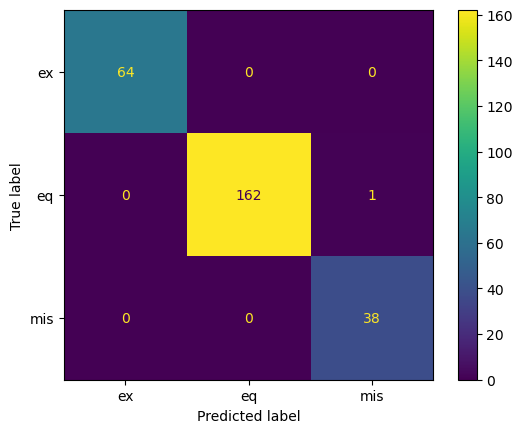

In [16]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                       display_labels=le.classes_)
display.plot()

# Feature importance

In [20]:
import matplotlib.pyplot as plt

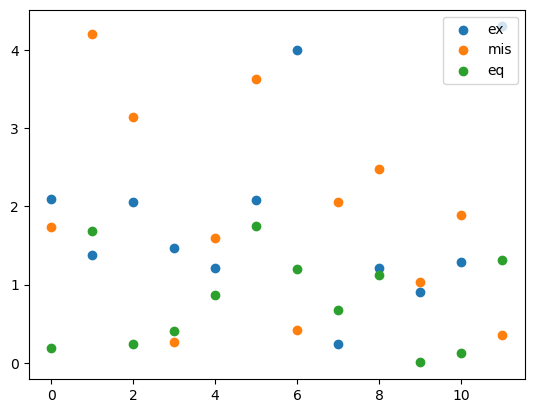

In [31]:
plt.scatter(np.arange(0, 12), abs(model.coef_[0, :]), label=le.classes_[0])
plt.scatter(np.arange(0, 12), abs(model.coef_[2, :]), label=le.classes_[2])
plt.scatter(np.arange(0, 12), abs(model.coef_[1, :]), label=le.classes_[1])
plt.legend()

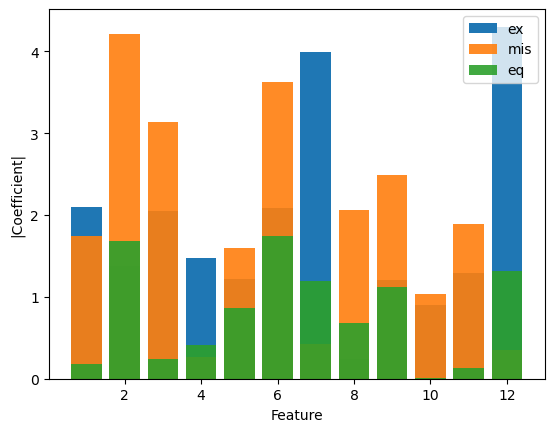

In [37]:
plt.bar(np.arange(0, 12)+1, abs(model.coef_[0, :]), label=le.classes_[0])
plt.bar(np.arange(0, 12)+1, abs(model.coef_[2, :]), label=le.classes_[2], alpha=0.9)
plt.bar(np.arange(0, 12)+1, abs(model.coef_[1, :]), label=le.classes_[1], alpha=0.9)
plt.ylabel("|Coefficient|")
plt.xlabel("Feature")
plt.legend()